# Correlations between variables

In this example, we will demonstrate how to apply correlations between variables. When using correlations, variables do not roam the variable space independently, but are related to each other. This influences all reliability, uncertainty and sensitivity simulations.

### Where to define correlations

Correlations are set in a relibaility, uncertainty or sensitivity project. They are set for the variables availiable in one of these projects. In this notebook we will not go into detail about these projects, but we only use it to demontrate correlations.

### Define model

For a project, we have  to define a model. We use the hunt model in this project, see the [relibility methods hunt](relibility methods hunt.ipynb) for explanation of the hunt model. From this model we use its variables.

See the next cell for setting up the project

In [1]:
from probabilistic_library import UncertaintyProject, DistributionType, UncertaintyMethod
from utils.models import hunt



We will create the uncertainty project. To get the available variables, we print the model.

In [2]:
project = UncertaintyProject()
project.model = hunt

project.model.print()

Model hunt:
Input parameters:
  t_p
  tan_alpha
  h_s
  h_crest
  h
Output parameters:
  Z


We assume the following distributions for the variables:

In [3]:
project.variables["t_p"].distribution = DistributionType.log_normal
project.variables["t_p"].mean = 3
project.variables["t_p"].deviation = 1

project.variables["tan_alpha"].distribution = DistributionType.deterministic
project.variables["tan_alpha"].mean = 0.333333

project.variables["h_s"].distribution = DistributionType.uniform
project.variables["h_s"].minimum = 0
project.variables["h_s"].maximum = 1

project.variables["h_crest"].distribution = DistributionType.log_normal
project.variables["h_crest"].mean = 10
project.variables["h_crest"].deviation = 0.05

project.variables["h"].distribution = DistributionType.uniform
project.variables["h"].minimum = 0
project.variables["h"].maximum = 5

### Uncorrelated variables

We will first run the project without correlations. Therefore we perform a Monte Carlo analysis, which takes random values of the variables according to their distributions. Then we plot the values used in this analysis.


300


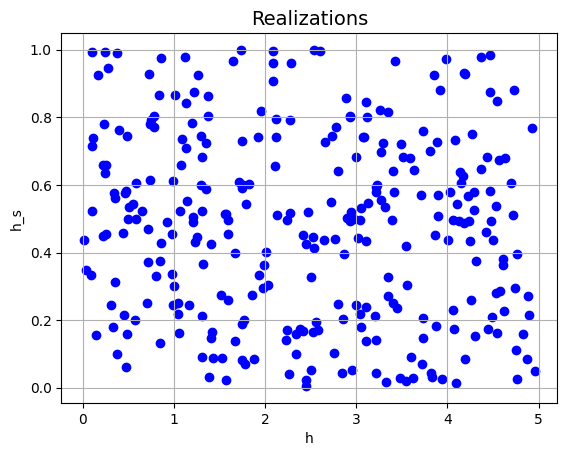

In [4]:
project.settings.uncertainty_method = UncertaintyMethod.crude_monte_carlo
project.settings.minimum_samples = 300
project.settings.maximum_samples = 300
project.settings.save_realizations = True

project.run()

print (len(project.result.realizations))

plt = project.result.get_plot_realizations('h', 'h_s')
plt.show()


### Correlated variables

We will now apply a correlation. We assume that the variables $h$ (water level) and $h_s$ are correlated, the higher the waterlevel, the higher the wave height. Therefore we apply a positive correlation between these variables and see how this affects the selection of random samples.



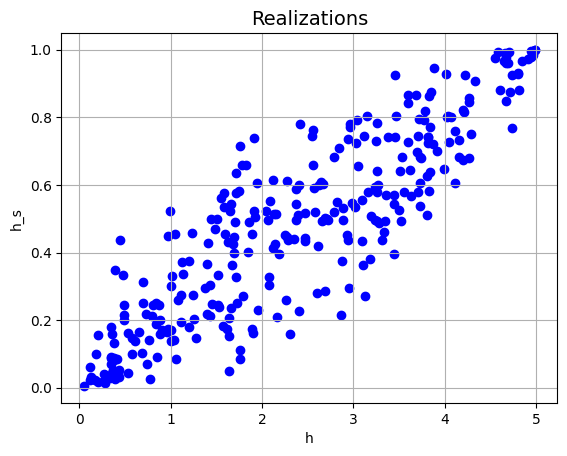

In [5]:
project.correlation_matrix['h', 'h_s'] = 0.9

project.run()

plt = project.result.get_plot_realizations('h', 'h_s')
plt.show()


In the second diagram we see that a higher value in $h$ leads to higher value of $h_s$

